In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
#import tensorflow_text as text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from keras.models import load_model, Sequential
from keras.layers import Embedding, Dense, SimpleRNN
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\schir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\schir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
# Load data
data = pd.read_csv('../data/raw/filtered.tsv', sep='\t')
data.head()

,Unnamed: 0,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
0,0,"If Alkar is flooding her with psychic waste, t...","if Alkar floods her with her mental waste, it ...",0.785171,0.010309,0.014195,0.981983
1,1,Now you're getting nasty.,you're becoming disgusting.,0.749687,0.071429,0.065473,0.999039
2,2,"Well, we could spare your life, for one.","well, we can spare your life.",0.919051,0.268293,0.213313,0.985068
3,3,"Ah! Monkey, you've got to snap out of it.","monkey, you have to wake up.",0.664333,0.309524,0.053362,0.994215
4,4,I've got orders to put her down.,I have orders to kill her.,0.726639,0.181818,0.009402,0.999348


In [33]:
data.iloc[0]['reference'], data.iloc[0]['translation']

('If Alkar is flooding her with psychic waste, that explains the high level of neurotransmitters.',
 'if Alkar floods her with her mental waste, it would explain the high levels of neurotransmitter.')

Обычный токенизатор

In [34]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import string
import re

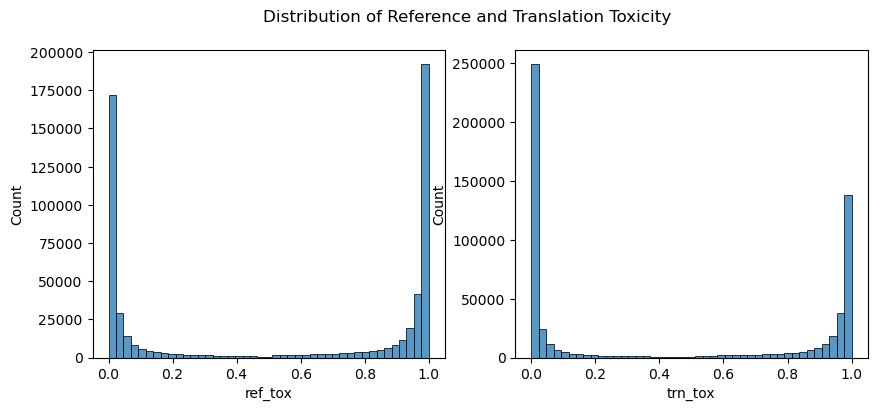

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.histplot(data['ref_tox'])

plt.subplot(122)
sns.histplot(data['trn_tox'])

plt.suptitle('Distribution of Reference and Translation Toxicity')
plt.show()


In [36]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\schir\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [37]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, \
    Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

[('like', 32796), ('don', 29799), ('just', 25589), ('fucking', 24268), ('shit', 22894), ('know', 22175), ('ll', 20045), ('hell', 16821), ('man', 16392), ('gonna', 15690), ('got', 15160), ('damn', 15001), ('want', 14717), ('fuck', 14341), ('kill', 14040), ('think', 12764), ('ve', 12586), ('right', 11117), ('going', 11019), ('little', 10554)]


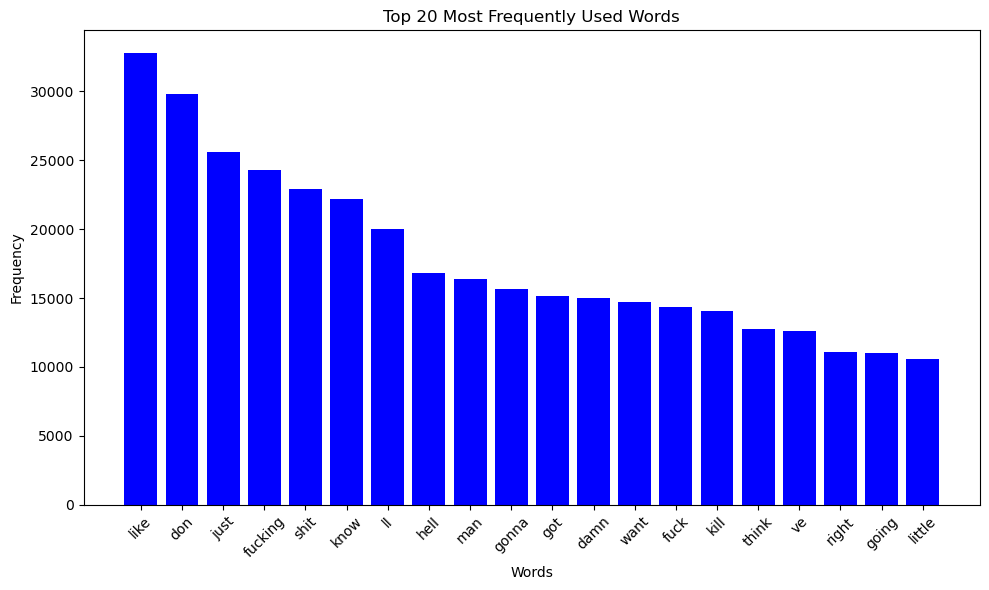

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(data['reference'])

word_counts = [(word, words.sum(axis=0)[0, idx]) for word, idx in cv.vocabulary_.items()]
word_counts = sorted(word_counts, key=lambda x: x[1], reverse=True)[:20]

print(word_counts)

df_word_counts = pd.DataFrame(word_counts, columns=['word', 'count'])

plt.figure(figsize=(10, 6))
plt.bar(df_word_counts['word'], df_word_counts['count'], color='blue')
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequently Used Words')
plt.tight_layout()
plt.show()
